In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [3]:
from sklearn.datasets import  load_iris

In [4]:
iris=load_iris()

In [5]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# Independent features
X=pd.DataFrame(iris['data'],columns=['sepal length','sepal width','petal length','petal width'])

In [8]:
# dependent features
y=iris['target']

In [9]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
# we dont require any standardization in decision tree we directly apply the algorithm


In [10]:
## apply Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
treeclassifier=DecisionTreeClassifier()

In [11]:
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

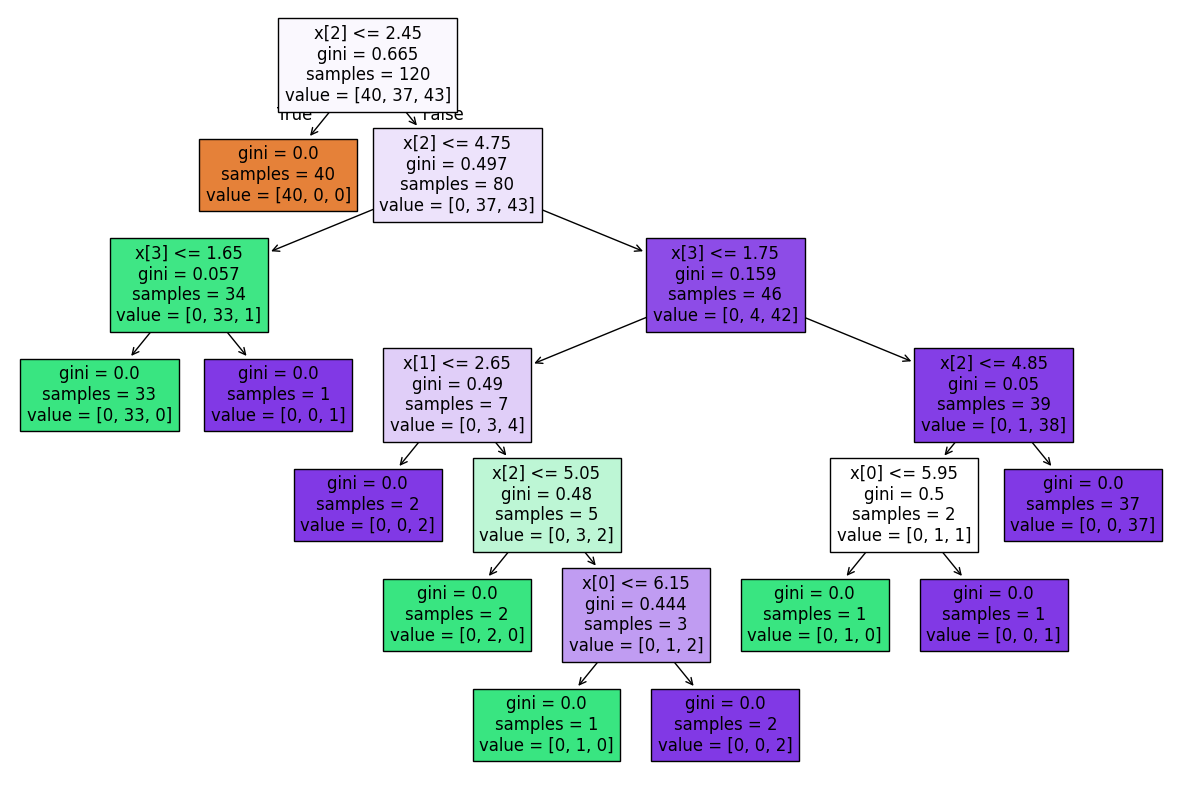

In [12]:
## visualtize the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(treeclassifier, filled=True)
plt.show()



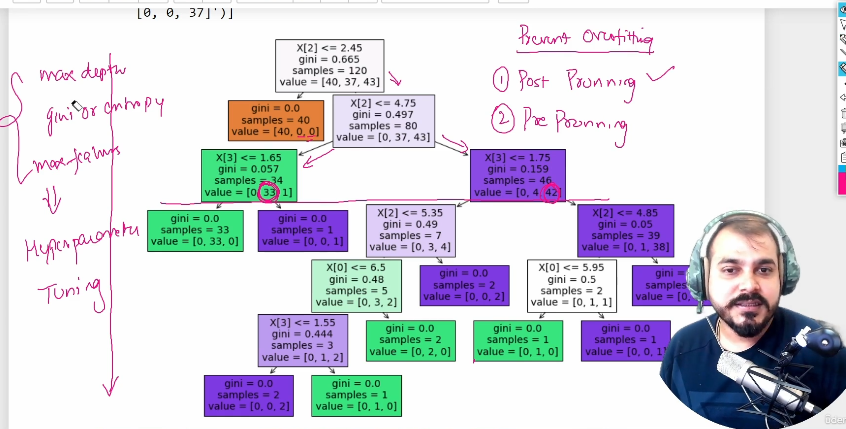

In [13]:
# ## apply Decision Tree Classifier
# from sklearn.tree import DecisionTreeClassifier
# treeclassifier=DecisionTreeClassifier(max_depth=2)
# now  make its maxdepth to 2 so that it donot go to the level 2 of the tree

In [14]:
y_pred=treeclassifier.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix,classification_report


In [16]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## **Decision Tree Classifier Prepruning And HyperParameter Tuning**

In [17]:
params={
    'criterion':['gini','entropy','log_loss']
    ,'splitter':['best','random']
    ,'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
treemodel=DecisionTreeClassifier()

In [21]:
grid=GridSearchCV(treeclassifier,param_grid=params,cv=5,scoring='accuracy')

In [22]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [24]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [30]:
grid.best_score_

np.float64(0.9583333333333334)

In [31]:
y_pred=grid.predict(X_test)

In [32]:
y_pred

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2])

In [36]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [37]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [38]:
score

1.0